<a href="https://colab.research.google.com/github/Deep-of-Machine/Data_analyze/blob/main/2%ED%95%99%EB%85%8413%EB%B0%98_st15_%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D13%2C14_%ED%95%99%EA%B5%90%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''주제 : 전국 고등학교 수가 가장 많은 지역은 어디일까?

1. 데이터 수집
2. 결측치 확인
3. 데이터 수집을 위한 컬럼 추출 [학교명, 학교급구분,시도교육청명]
4. 고등학교 데이터 추출
5. 시도 교육청 별 정렬 및 갯수 세기
6. 선 그래프로 표현하기
7. 막대 그래프로 표현하기'''

In [ ]:
#데이터 수집
import pandas as pd
import numpy as np

df=pd.read_csv('학교데이터.csv',encoding='cp949')

In [ ]:
#전체 데이터 확인
df.head(5)

,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자
0,B000012208,대구남산고등학교,고등학교,1953-01-31,사립,본교,운영,대구광역시 수성구 수성동1가 96-16,대구광역시 수성구 신천동로 364,7240000,대구광역시교육청,7251000,대구광역시동부교육지원청,2013-11-29,2020-09-19,35.857312,128.609179,2020-09-22
1,B000026354,고헌중학교,중학교,2020-03-01,공립,본교,운영,울산광역시 북구 화봉동 1485-1,울산광역시 북구 박상진2로 81,7480000,울산광역시교육청,7491000,울산광역시강북교육지원청,2013-11-29,2020-09-19,35.597779,129.364027,2020-09-22
2,B000002653,서감초등학교,초등학교,1984-03-30,공립,본교,운영,부산광역시 사상구 감전동 122-1,부산광역시 사상구 괘감로 64,7150000,부산광역시교육청,7201000,부산광역시북부교육지원청,2013-11-29,2020-09-19,35.157820,128.982060,2020-09-22
3,B000009788,상장중학교,중학교,1983-12-31,공립,본교,운영,강원도 태백시 황지동 123,강원도 태백시 태백로 1221,7800000,강원도교육청,7851000,강원도태백교육지원청,2013-11-29,2020-09-19,37.150686,128.992122,2020-09-22
4,B000005015,맹방초등학교,초등학교,1946-12-12,공립,본교,운영,강원도 삼척시 근덕면 상맹방리 171-2,강원도 삼척시 근덕면 삼척로 3884-4,7800000,강원도교육청,7871000,강원도삼척교육지원청,2013-11-29,2020-09-19,37.398527,129.212777,2020-09-22


In [ ]:
#데이터 정보 확인을 통한 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11928 entries, 0 to 11927
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   학교ID      11928 non-null  object 
 1   학교명       11928 non-null  object 
 2   학교급구분     11928 non-null  object 
 3   설립일자      11928 non-null  object 
 4   설립형태      11928 non-null  object 
 5   본교분교구분    11928 non-null  object 
 6   운영상태      11928 non-null  object 
 7   소재지지번주소   11928 non-null  object 
 8   소재지도로명주소  11928 non-null  object 
 9   시도교육청코드   11928 non-null  int64  
 10  시도교육청명    11928 non-null  object 
 11  교육지원청코드   11928 non-null  int64  
 12  교육지원청명    11928 non-null  object 
 13  생성일자      11928 non-null  object 
 14  변경일자      11927 non-null  object 
 15  위도        11928 non-null  float64
 16  경도        11928 non-null  float64
 17  데이터기준일자   11928 non-null  object 
dtypes: float64(2), int64(2), object(14)
memory usage: 1.6+ MB


In [ ]:
#데이터 컬럼 확인
df.columns

Index(['학교ID', '학교명', '학교급구분', '설립일자', '설립형태', '본교분교구분', '운영상태', '소재지지번주소',
       '소재지도로명주소', '시도교육청코드', '시도교육청명', '교육지원청코드', '교육지원청명', '생성일자', '변경일자',
       '위도', '경도', '데이터기준일자'],
      dtype='object')

In [ ]:
#필요한 데이터 컬럼 추출
df1=df[['학교명','학교급구분','시도교육청명']]
df1

,학교명,학교급구분,시도교육청명
0,대구남산고등학교,고등학교,대구광역시교육청
1,고헌중학교,중학교,울산광역시교육청
2,서감초등학교,초등학교,부산광역시교육청
3,상장중학교,중학교,강원도교육청
4,맹방초등학교,초등학교,강원도교육청
...,...,...,...
11923,아림고등학교,고등학교,경상남도교육청
11924,순천성동초등학교,초등학교,전라남도교육청
11925,단성초등학교,초등학교,경상남도교육청
11926,서부초등학교,초등학교,경기도교육청


In [ ]:
#'학교급구분'데이터 중 고등학교만 데이터 추출
df2=df1[df1['학교급구분'].isin(['고등학교'])]
df2

,학교명,학교급구분,시도교육청명
0,대구남산고등학교,고등학교,대구광역시교육청
14,부일외국어고등학교,고등학교,부산광역시교육청
16,삼성여자고등학교,고등학교,부산광역시교육청
21,서울문영여자고등학교,고등학교,서울특별시교육청
28,영신고등학교,고등학교,대구광역시교육청
...,...,...,...
11912,대구농업마이스터고등학교,고등학교,대구광역시교육청
11913,위례한빛고등학교,고등학교,경기도교육청
11917,온양용화고등학교,고등학교,충청남도교육청
11923,아림고등학교,고등학교,경상남도교육청


In [ ]:
#학교명에서 고등학교 문자열이 포함된 데이터 추출
df3=df1[df1['학교명'].str.contains('고등학교')]
df3

,학교명,학교급구분,시도교육청명
0,대구남산고등학교,고등학교,대구광역시교육청
14,부일외국어고등학교,고등학교,부산광역시교육청
16,삼성여자고등학교,고등학교,부산광역시교육청
21,서울문영여자고등학교,고등학교,서울특별시교육청
28,영신고등학교,고등학교,대구광역시교육청
...,...,...,...
11912,대구농업마이스터고등학교,고등학교,대구광역시교육청
11913,위례한빛고등학교,고등학교,경기도교육청
11917,온양용화고등학교,고등학교,충청남도교육청
11923,아림고등학교,고등학교,경상남도교육청


In [ ]:
#시도 교육청 별 정렬 및 갯수 세기
df4=df2.groupby(by=['시도교육청명'], as_index=False).count()
df4

,시도교육청명,학교명,학교급구분
0,강원도교육청,116,116
1,경기도교육청,480,480
2,경상남도교육청,190,190
3,경상북도교육청,185,185
4,광주광역시교육청,67,67
5,대구광역시교육청,93,93
6,대전광역시교육청,62,62
7,부산광역시교육청,142,142
8,서울특별시교육청,320,320
9,세종특별자치시교육청,20,20


In [ ]:
#한글폰트 설치하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#나눔 글꼴 설치하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
#선래프 그리기
import matplotlib.pyplot as plt
plt.plot(df['시도'],**)
** #x축 회전그
plt.show()

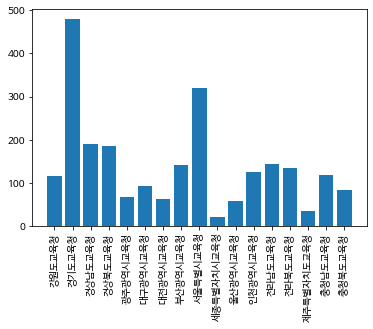

In [ ]:
#막대 그래프 그리기
import matplotlib.pyplot as plt
plt.bar(df4['시도교육청명'],df4['학교명'])
plt.xticks(rotation = 90)
plt.show()

#추가 위도,경도 데이터 활용하기

In [ ]:
df

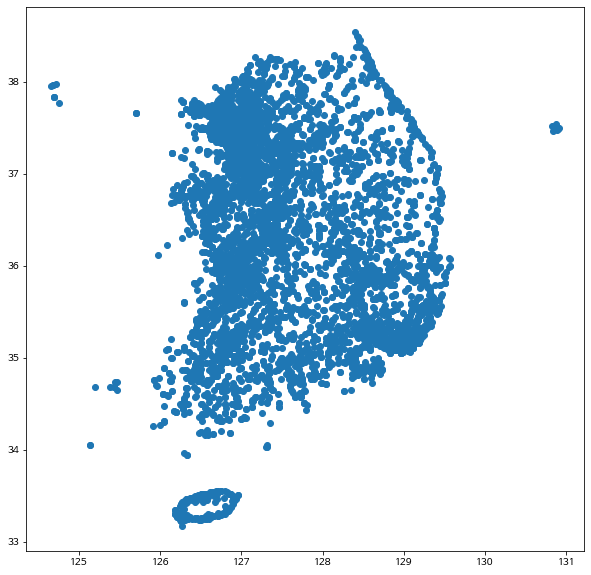

In [ ]:
#전국 학교 경도, 위도 데이터로 표현하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10)) #캔버스사이즈 변경

경도=df['경도']
위도=df['위도']

plt.scatter(경도,위도)

plt.show()

<참고> 제주도 고등학교 지도에 표시하기(folium라이브러리)

In [ ]:
#'학교명','학교급구분','시도교육청명','위도','경도' 컬럼추출
df5=df[['학교명','학교급구분','시도교육청명','위도','경도']]
df6=df5[df5['시도교육청명'].isin(['제주특별자치도교육청'])]
df7=df6[df6['학교급구분'].isin(['고등학교'])]
df7

,학교명,학교급구분,시도교육청명,위도,경도
1861,제주과학고등학교,고등학교,제주특별자치도교육청,33.426620,126.531445
3994,한림고등학교,고등학교,제주특별자치도교육청,33.397751,126.258320
4117,삼성여자고등학교,고등학교,제주특별자치도교육청,33.254357,126.583574
4633,중문고등학교,고등학교,제주특별자치도교육청,33.254865,126.446895
4877,영주고등학교,고등학교,제주특별자치도교육청,33.454787,126.579764
5356,오현고등학교,고등학교,제주특별자치도교육청,33.517802,126.556449
5402,제주여자고등학교,고등학교,제주특별자치도교육청,33.483334,126.539762
5470,제주고등학교,고등학교,제주특별자치도교육청,33.472373,126.481671
5961,서귀포고등학교,고등학교,제주특별자치도교육청,33.257017,126.563108
6244,남녕고등학교,고등학교,제주특별자치도교육청,33.490057,126.481981


In [ ]:
#range(5)로 리스트 [0,1,2,3,4]를 만들어 print(i)를 5번 반복
for i in range(5):
  print(i)

0
1
2
3
4


In [ ]:
#df7의 전체 데이터 갯수(길이)를 구함.
len(df7)

34

In [ ]:
#folium 지도시각화를 위한 라이브러리
import folium
map_osm = folium.Map(location=[33.49130755,126.539486], zoom_start=12)
# 제주중앙여자고등학교 위도,경도 : 33.49130755,126.539486

map_osm # map출력

In [ ]:
df7

,학교명,학교급구분,시도교육청명,위도,경도
0,제주과학고등학교,고등학교,제주특별자치도교육청,33.426620,126.531445
1,한림고등학교,고등학교,제주특별자치도교육청,33.397751,126.258320
2,삼성여자고등학교,고등학교,제주특별자치도교육청,33.254357,126.583574
3,중문고등학교,고등학교,제주특별자치도교육청,33.254865,126.446895
4,영주고등학교,고등학교,제주특별자치도교육청,33.454787,126.579764
5,오현고등학교,고등학교,제주특별자치도교육청,33.517802,126.556449
6,제주여자고등학교,고등학교,제주특별자치도교육청,33.483334,126.539762
7,제주고등학교,고등학교,제주특별자치도교육청,33.472373,126.481671
8,서귀포고등학교,고등학교,제주특별자치도교육청,33.257017,126.563108
9,남녕고등학교,고등학교,제주특별자치도교육청,33.490057,126.481981


In [ ]:
# 표기를 위한 인덱스 리셋
df7=df7.reset_index()
df7

,index,학교명,학교급구분,시도교육청명,위도,경도
0,0,제주과학고등학교,고등학교,제주특별자치도교육청,33.426620,126.531445
1,1,한림고등학교,고등학교,제주특별자치도교육청,33.397751,126.258320
2,2,삼성여자고등학교,고등학교,제주특별자치도교육청,33.254357,126.583574
3,3,중문고등학교,고등학교,제주특별자치도교육청,33.254865,126.446895
4,4,영주고등학교,고등학교,제주특별자치도교육청,33.454787,126.579764
5,5,오현고등학교,고등학교,제주특별자치도교육청,33.517802,126.556449
6,6,제주여자고등학교,고등학교,제주특별자치도교육청,33.483334,126.539762
7,7,제주고등학교,고등학교,제주특별자치도교육청,33.472373,126.481671
8,8,서귀포고등학교,고등학교,제주특별자치도교육청,33.257017,126.563108
9,9,남녕고등학교,고등학교,제주특별자치도교육청,33.490057,126.481981


In [ ]:
#index 컬럼 삭제
df7=df7.drop(['index'],axis=1)

In [ ]:
# df7 길이만큼 반복하며 i행의 위도,경도의 
for i in range(len(df7)):
  #folium.Circle(df7.loc[i,['위도','경도']],radius=200).add_to(map_osm)
  folium.Marker(df7.loc[i,['위도','경도']]).add_to(map_osm)
map_osm